In [87]:
#libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Gather

In [88]:
#read twitter-archive-enhanced file
twarchive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [89]:
twarchive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [91]:
#download image
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [ ]:
#save downloaded file 

with open(os.path.join(url.split('/')[-1]),mode = "wb") as file:
        file.write(response.content)


os.listdir()

In [92]:
#image predictions dataframe

imgpred_df = pd.read_csv('image-predictions.tsv', sep = "\t")

imgpred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## I don't have twitter developer account 

In [6]:
#Accessing Project Data Without a Twitter Account
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitterarchive_df.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
 #       count += 1
  #      print(str(count) + ": " + str(tweet_id))
   #     try:
    #        tweet = api.get_status(tweet_id, tweet_mode='extended')
     #       print("Success")
      #      json.dump(tweet._json, outfile)
       #     outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [93]:
#project resources file 
with open('tweet-json copy', 'r') as f:
    data_df = pd.read_json(f, lines= True, encoding = 'utf-8')

data_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [94]:
# select the columns of interest : 'id', 'favorite_count','retweet_count'
data_df = data_df.loc[:,['id','favorite_count','retweet_count']]

# top_5
data_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assessing Data


In [95]:
#Assessing the twitter archive
twarchive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [96]:
#Assessing the image predictions
imgpred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [97]:
#Assessing the tweet json file data
data_df

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [98]:
twarchive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [100]:
imgpred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [101]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [102]:
twarchive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [103]:
imgpred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [104]:
data_df.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000





# Clean Data




In [126]:
#copy of the datasets
twarchive_clean = twarchive_df.copy()
imgpred_clean = imgpred_df.copy()
data_clean =  data_df.copy()

# Quality

Define

Delete rows that have non-empty "retweeted_status_id and retweeted_status_user_id and retweeted_status_timestamp from twitterarchive_clean



code 

In [127]:
retweeted_ind = twarchive_clean.query('retweeted_status_id != "NaN"').index
retweeted_ind

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [128]:
twarchive_clean.drop(retweeted_index, axis=0, inplace=True)
twarchive_clean.reset_index(drop=True, inplace=True)

test

In [129]:

twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

Define 

Delete "in_reply_to_status_id and in_reply_to_user_id and retweeted_status_id and retweeted_status_user_id and retweeted_status_timestamp" columns from twitterarchive_clean because we need the original tweets only


Code


In [130]:
twarchive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                           'retweeted_status_user_id', 'retweeted_status_timestamp'],
                          axis=1, inplace=True)


Test


In [131]:
twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 204.0+ KB


Define

Delete the null rows in expanded_urls



Code

In [132]:
twarchive_clean.dropna(subset=['tweet_id','expanded_urls'], inplace=True)
twarchive_clean.reset_index(drop=True, inplace=True)

In [133]:
twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
dtypes: int64(3), object(9)
memory usage: 198.6+ KB


Define 

Change type of timestamp from string to datatime64



Code


In [134]:
twarchive_clean.timestamp = twitterarchive_clean.timestamp.astype('datetime64')

Test

In [135]:
twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2117 non-null   int64         
 1   timestamp           2117 non-null   datetime64[ns]
 2   source              2117 non-null   object        
 3   text                2117 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2117 non-null   int64         
 6   rating_denominator  2117 non-null   int64         
 7   name                2117 non-null   object        
 8   doggo               2117 non-null   object        
 9   floofer             2117 non-null   object        
 10  pupper              2117 non-null   object        
 11  puppo               2117 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 198.6+ KB


Define

change type of tweet_id to object because we dont need to us it in math operation


In [136]:
#Code
twarchive_clean.tweet_id = twitterarchive_clean.tweet_id.astype('str')

In [137]:
#Test
twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2117 non-null   object        
 1   timestamp           2117 non-null   datetime64[ns]
 2   source              2117 non-null   object        
 3   text                2117 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2117 non-null   int64         
 6   rating_denominator  2117 non-null   int64         
 7   name                2117 non-null   object        
 8   doggo               2117 non-null   object        
 9   floofer             2117 non-null   object        
 10  pupper              2117 non-null   object        
 11  puppo               2117 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 198.6+ KB


Define


change the type of rating_numerator from int64 to float



In [138]:
#Code
twarchive_clean.rating_numerator = twarchive_clean.rating_numerator.astype('float')

In [139]:
#Test
twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2117 non-null   object        
 1   timestamp           2117 non-null   datetime64[ns]
 2   source              2117 non-null   object        
 3   text                2117 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2117 non-null   float64       
 6   rating_denominator  2117 non-null   int64         
 7   name                2117 non-null   object        
 8   doggo               2117 non-null   object        
 9   floofer             2117 non-null   object        
 10  pupper              2117 non-null   object        
 11  puppo               2117 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 198.6+ KB


Define


change the type of rating_denominator from int64 to float



In [140]:
#Code
twarchive_clean.rating_denominator = twarchive_clean.rating_denominator.astype('float')

In [141]:
#Test
twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2117 non-null   object        
 1   timestamp           2117 non-null   datetime64[ns]
 2   source              2117 non-null   object        
 3   text                2117 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2117 non-null   float64       
 6   rating_denominator  2117 non-null   float64       
 7   name                2117 non-null   object        
 8   doggo               2117 non-null   object        
 9   floofer             2117 non-null   object        
 10  pupper              2117 non-null   object        
 11  puppo               2117 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 198.6+ KB


In [142]:
#imgpredictions_clean file
imgpred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Define


change type of tweet_id from int64 to object



In [143]:
#code
imgpred_clean.tweet_id = imgpred_clean.tweet_id.astype('str')

In [144]:
#Test
imgpred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [145]:
#getdata_clean file
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


Define


change type of id from int64 to object



In [147]:
#Code
data_clean.id = data_clean.id.astype('str')

In [148]:
#Test
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


correct decimals values in rating numerator



In [149]:
twarchive_clean[twarchive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]



C:\Users\Ahmed\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
41,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,None,None,None,None
531,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None
588,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,None,None,pupper,None
1486,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,None,None,None


In [150]:
tweets_corr_dict = {'883482846933004288': [13.50, 10],
                          '786709082849828864': [9.75, 10], 
                          '778027034220126208': [11.27, 10],
                          '680494726643068929': [11.26, 10]
                          }

for key, value in tweets_corr_dict.items():
    twarchive_clean.loc[twitterarchive_clean.query('tweet_id == "{}"'.format(key)).index,'rating_numerator'] = value[0]
    twarchive_clean.loc[twitterarchive_clean.query('tweet_id == "{}"'.format(key)).index,'rating_denominator'] = value[1]

In [151]:
twarchive_clean[twarchive_clean.tweet_id.isin(list(tweets_corr_dict.keys()))]
[['tweet_id', 'rating_numerator', 'rating_denominator']]

[['tweet_id', 'rating_numerator', 'rating_denominator']]

In [152]:
twarchive_clean[twarchive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Ahmed\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
41,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,None,None,None,None
531,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,None,None,None
588,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,None,None,pupper,None
1486,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,None,None,None,None


Define


creat rating column and merge rating_numerator and rating_denominator on it



In [153]:
#Code
twarchive_clean['rating'] = twarchive_clean.rating_numerator / twarchive_clean.rating_denominator

In [154]:
twarchive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [156]:
#Test
twarchive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2


In [158]:
twarchive_clean[twarchive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Ahmed\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
41,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,Bella,None,None,None,None,1.350
531,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,Logan,None,None,None,None,0.975
588,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,Sophie,None,None,pupper,None,1.127
1486,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,None,None,None,None,None,1.126


If text has the word 'named', replace the name with the word after it. else, replace name with None.


In [159]:
wrong = twarchive_clean.query('name in ["a", "an", "the", "such"]')
wrong

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
21,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,such,None,None,None,None,1.4
51,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,a,None,None,pupper,None,1.4
497,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,a,None,None,None,None,1.3
618,772581559778025472,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,a,None,None,None,None,1.0
795,747885874273214464,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,a,None,None,None,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...
2110,666051853826850816,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,an,None,None,None,None,0.2
2111,666050758794694657,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,a,None,None,None,None,1.0
2113,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,None,None,None,None,0.6
2114,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,None,None,None,None,0.9


In [160]:
def correct_name_func(text):
    split_list = text.split()
    if 'named' in split_list:
        name_index = split_list.index('named') + 1
        name = split_list[name_index]
        return name
    else:
        return None

In [163]:
wrong['correct_name'] = wrong.apply(lambda x: correct_name_func(x['text']), axis=1)

C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
wrong

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,correct_name
21,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,such,None,None,None,None,1.4,None
51,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,a,None,None,pupper,None,1.4,None
497,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,a,None,None,None,None,1.3,None
618,772581559778025472,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,a,None,None,None,None,1.0,None
795,747885874273214464,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,a,None,None,None,None,0.8,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2110,666051853826850816,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,an,None,None,None,None,0.2,None
2111,666050758794694657,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,a,None,None,None,None,1.0,None
2113,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,None,None,None,None,0.6,None
2114,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,None,None,None,None,0.9,None


In [165]:
correctname_dic = {}
for index, row in wrong_name.iterrows():
    correctname_dic[row.tweet_id] = row.correct_name
correctname_dic

{'887517139158093824': None,
 '881536004380872706': None,
 '792913359805018113': None,
 '772581559778025472': None,
 '747885874273214464': None,
 '747816857231626240': None,
 '746872823977771008': None,
 '746369468511756288': None,
 '743222593470234624': None,
 '717537687239008257': None,
 '715733265223708672': None,
 '704859558691414016': None,
 '704054845121142784': None,
 '703079050210877440': None,
 '703041949650034688': None,
 '702539513671897089': None,
 '700864154249383937': None,
 '692187005137076224': None,
 '690360449368465409': None,
 '685943807276412928': None,
 '679530280114372609': None,
 '677644091929329666': None,
 '677269281705472000': None,
 '676613908052996102': None,
 '675706639471788032': 'Wylie.',
 '675534494439489536': None,
 '675109292475830276': None,
 '675047298674663426': None,
 '674082852460433408': None,
 '673715861853720576': None,
 '673636718965334016': 'Kip.',
 '672604026190569472': None,
 '671743150407421952': 'Jacob',
 '671561002136281088': None,
 '671

In [166]:
namecolumn_index = list(twarchive_clean.columns).index('name')
namecolumn_index

5

In [167]:
namecolumn_index = list(twarchive_clean.columns).index('name')
for index, row in twarchive_clean.iterrows():
    if row['tweet_id'] in correctname_dic.keys():
        twarchive_clean.iloc[index, namecolumn_index] = correctname_dic[row.tweet_id]

In [168]:
#Test
twarchive_clean.query('name in ["a", "an", "the", "such"]')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating


# Tidiness


Define

creat dog_stage column by joining The values of four columns "doggo,floofer,pupper,puppo"
Code



code

In [56]:
twarchive_clean.iloc[:, -4:  ] = twarchive_clean.iloc[:, -4:  ].replace('None','')

In [169]:
twarchive_clean['dog_stage'] =  twarchive_clean['doggo'] + twarchive_clean['floofer'] + twarchive_clean['pupper'] + twarchive_clean['puppo'] 

In [170]:
twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2117 non-null   object        
 1   timestamp      2117 non-null   datetime64[ns]
 2   source         2117 non-null   object        
 3   text           2117 non-null   object        
 4   expanded_urls  2117 non-null   object        
 5   name           2067 non-null   object        
 6   doggo          2117 non-null   object        
 7   floofer        2117 non-null   object        
 8   pupper         2117 non-null   object        
 9   puppo          2117 non-null   object        
 10  rating         2117 non-null   float64       
 11  dog_stage      2117 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 198.6+ KB


In [171]:
# check for the values of the new column
twarchive_clean.dog_stage.value_counts()

NoneNoneNoneNone        1779
NoneNonepupperNone       222
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

In [172]:
twarchive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

In [173]:
twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2117 non-null   object        
 1   timestamp      2117 non-null   datetime64[ns]
 2   source         2117 non-null   object        
 3   text           2117 non-null   object        
 4   expanded_urls  2117 non-null   object        
 5   name           2067 non-null   object        
 6   rating         2117 non-null   float64       
 7   dog_stage      2117 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 132.4+ KB


In [174]:
twarchive_clean.loc[twarchive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
twarchive_clean.loc[twarchive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'
twarchive_clean.loc[twarchive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'

In [175]:
twarchive_clean.dog_stage =twarchive_clean.dog_stage.replace('' ,np.nan)

In [176]:
#Test
# check for the values of the new column
twarchive_clean

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NoneNoneNoneNone
...,...,...,...,...,...,...,...,...
2112,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,0.5,NoneNoneNoneNone
2113,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,None,0.6,NoneNoneNoneNone
2114,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,None,0.9,NoneNoneNoneNone
2115,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,None,0.7,NoneNoneNoneNone


# imgpredictions_clean file columns p1,p1_dog_p1_conf,...etc to dog_breed, confidence


Define

rename the No breed values with np.nan and replace the underscore with space and title all breeds values



Code

In [177]:
breed = []
confidence = []


def dog_breed_confidence(data):
    if data.p1_dog:
        breed.append(data.p1)
        confidence.append(data.p1_conf)
    elif data.p2_dog:
        breed.append(data.p2)
        confidence.append(data.p2_conf)
    elif data.p3_dog :
        breed.append(data.p3)
        confidence.append(data.p3_conf)
    else:
        breed.append('No breed')
        confidence.append(0)
      
imgpred_clean.apply(dog_breed_confidence,axis =1)

imgpred_clean['dog_breed'] = breed
imgpred_clean['confidence'] = confidence

imgpred_clean.drop(columns = ['p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog',
                                 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)

imgpred_clean.replace('No breed',np.nan, inplace=True)

imgpred_clean.dog_breed= imgpred_clean.dog_breed.str.replace('_',' ').str.title()

In [178]:
imgpred_clean.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311


# merge twitterarchive_clean and getdata_clean


Define

use the merge function to merge twitterarchive_clean and getdata_clean on tweet_id column (left join)

use the merge function to merge twitterarchive_clean and imgpredictions_clean on tweet_id column (inner join)

Code

In [179]:
# rename the id column in getdata_clean to tweet_id
data_clean.columns = ['tweet_id', 'favorite_count', 'retweet_count']

test

In [180]:
data_clean

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [181]:
# merge twitterarchive_clean and getdata_clean on tweet_id column (left join)
twarchive_clean = pd.merge(twarchive_clean, data_clean , how = 'left' , on = 'tweet_id')

# use the merge function to merge `twitterarchive_clean` and `imgpredictions_clean` on tweet_id column (inner join) 
# and make master dataset
master_dataset = pd.merge(twarchive_clean, imgpred_clean , how = 'inner' , on = 'tweet_id')

In [182]:
master_dataset

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,favorite_count,retweet_count,jpg_url,img_num,dog_breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NoneNoneNoneNone,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NoneNoneNoneNone,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NoneNoneNoneNone,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NoneNoneNoneNone,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NoneNoneNoneNone,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,0.5,NoneNoneNoneNone,111,41,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311
1990,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,None,0.6,NoneNoneNoneNone,311,147,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
1991,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,None,0.9,NoneNoneNoneNone,128,47,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
1992,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,None,0.7,NoneNoneNoneNone,132,48,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826


In [183]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1994 non-null   object        
 1   timestamp       1994 non-null   datetime64[ns]
 2   source          1994 non-null   object        
 3   text            1994 non-null   object        
 4   expanded_urls   1994 non-null   object        
 5   name            1945 non-null   object        
 6   rating          1994 non-null   float64       
 7   dog_stage       1994 non-null   object        
 8   favorite_count  1994 non-null   int64         
 9   retweet_count   1994 non-null   int64         
 10  jpg_url         1994 non-null   object        
 11  img_num         1994 non-null   int64         
 12  dog_breed       1686 non-null   object        
 13  confidence      1994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
me

# new columns for day_name and month for more


Define

creat month column

creat day name column


code

In [184]:
# extract the month name
master_dataset['month'] = master_dataset.timestamp.apply(lambda x: x.month_name())
#extarct the day_name
master_dataset['day_name'] = master_dataset.timestamp.apply(lambda x: x.day_name())

In [185]:
#Test
master_dataset.loc[:5,['timestamp','day_name','month']]

,timestamp,day_name,month
0,2017-08-01 16:23:56,Tuesday,August
1,2017-08-01 00:17:27,Tuesday,August
2,2017-07-31 00:18:03,Monday,July
3,2017-07-30 15:58:51,Sunday,July
4,2017-07-29 16:00:24,Saturday,July
5,2017-07-29 00:08:17,Saturday,July


In [74]:
master_dataset

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,favorite_count,retweet_count,jpg_url,img_num,dog_breed,confidence,month,day_name
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.000000,August,Tuesday
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,August,Tuesday
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,July,Monday
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,July,Sunday
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,July,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,0.5,None,111,41,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,November,Monday
1990,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,None,0.6,None,311,147,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,November,Monday
1991,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,None,0.9,None,128,47,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,November,Sunday
1992,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,None,0.7,None,132,48,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,November,Sunday


# Storing Data




In [186]:
# Store the data after combinig and cleaning 
master_dataset.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)



# Visualization & Analysis


# Insight(1): 

most source used to share dog's photo

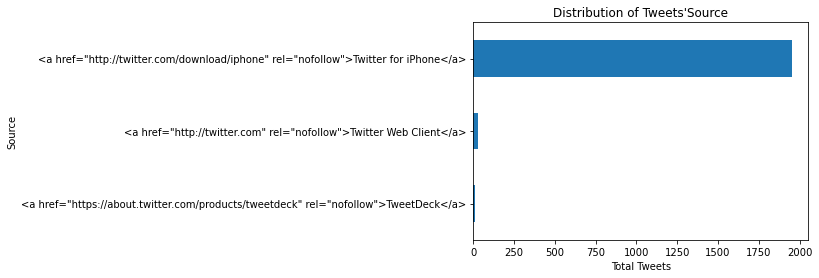

In [76]:
plt.title("Distribution of Tweets'Source")
master_dataset.source.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Total Tweets')
plt.ylabel('Source');

In [77]:
# percentage of sources
master_dataset.source.value_counts() / master_dataset.source.value_counts().sum()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     0.980441
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     0.014042
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    0.005517
Name: source, dtype: float64


Twitter app in Iphone has the most share 98%


# Insight(2): 

the most common dog stage


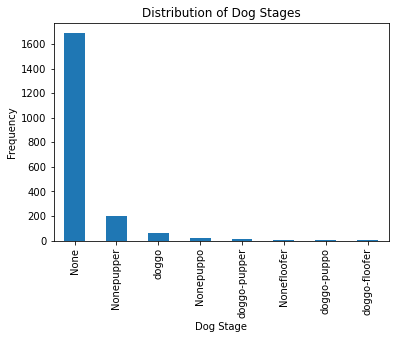

In [78]:
# select the dog_ stage frequencies
master_dataset.dog_stage.value_counts().plot(kind='bar')
plt.title("Distribution of Dog Stages")
plt.xlabel('Dog Stage')
plt.ylabel('Frequency');

# Insight(3): 

the most popular day to post a dog photo




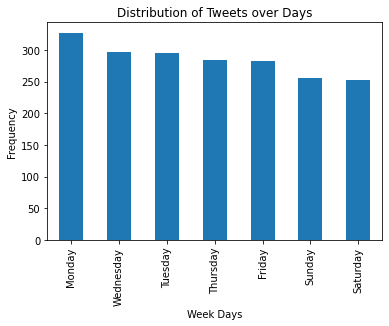

In [79]:
master_dataset.day_name.value_counts().plot(kind='bar')
plt.title("Distribution of Tweets over Days")
plt.xlabel('Week Days')
plt.ylabel('Frequency');

# Insight(4): 

“doggo-puppo” is the most preferable dog stage by the users; as this stage has got the highest number of retweets and favorites.


In [80]:
master_dataset.groupby(['dog_stage']).retweet_count.mean().sort_values(ascending=False)[0:10]

dog_stage
doggo-puppo      19196.000000
doggo             7125.698413
Nonepuppo         6473.954545
Nonefloofer       4968.714286
doggo-pupper      4083.444444
doggo-floofer     3433.000000
None              2577.957346
Nonepupper        2363.581281
Name: retweet_count, dtype: float64

In [81]:
master_dataset.groupby(['dog_stage']).favorite_count.mean().sort_values(ascending=False)[0:10]

dog_stage
doggo-puppo      47844.000000
Nonepuppo        21582.090909
doggo            19356.380952
doggo-floofer    17169.000000
Nonefloofer      13206.000000
doggo-pupper     12533.111111
None              8478.924763
Nonepupper        7197.738916
Name: favorite_count, dtype: float64

# Insight(5): 

“Bedlington Terrier ” is the most retweeted dog, while “black-and-tan_coonhound” is the most favorited dog

In [82]:
master_dataset.groupby(['dog_breed']).retweet_count.mean().sort_values(ascending=False)[0:10]

dog_breed
Bedlington Terrier    7510.166667
Afghan Hound          5976.000000
Standard Poodle       5508.909091
English Springer      5401.600000
Saluki                5133.750000
French Bulldog        5039.677419
Cocker Spaniel        4858.100000
Samoyed               4843.952381
Whippet               4840.272727
Great Pyrenees        4533.866667
Name: retweet_count, dtype: float64

In [83]:
master_dataset.groupby(['dog_breed']).favorite_count.mean().sort_values(ascending=False)[0:5]

dog_breed
Saluki                  24060.000000
Bedlington Terrier      21153.166667
French Bulldog          18416.806452
Bouvier Des Flandres    18032.000000
Afghan Hound            17326.666667
Name: favorite_count, dtype: float64